# <span style="color: tomato;">Tarea Grupal Tech: Entrenamiento de ML y archivos .pkl </span>

## <span style="color: pink;">Grupo: </span>
Desir√©e Vera, Felipe G√≥mez, Harmynn Garrido y Diego Granados


### <span style="color: darkorange;">Parte A: Descripci√≥n de Datos </span>

Se busca predecir si un  cliente se no pagar√° sus obligaciones a trav√©s de un modelo de clasificaci√≥n.

El problema es el no pago de las deudas (default) de los clientes, por lo que se busca determinar si un cliente determinado caer√° en default o no, esto tiene un impacto econ√≥mico en las instituciones crediticias.  La variable objetivo es binaria, 1 si el cliente incurre en default y 0 cliente cumple con el pago.

En el archivo ‚ÄúTabla Trabajo Grupal N¬∞2‚Äù, se encuentran dos tablas (Modelamiento y Predicci√≥n) con los siguientes 
campos para el modelamiento binario:

‚Ä¢ Edad: Campo cuantitativo que detalla la edad del cliente.

‚Ä¢ Nivel Educacional: Campo categ√≥rico que detalla el nivel educacional del cliente.

‚Ä¢ A√±os Trabajando: Campo cuantitativo con el detalle de los a√±os trabajando del cliente.

‚Ä¢ Ingresos: Campo cuantitativo que detalla el monto encriptado del ingreso del cliente.

‚Ä¢ Deuda Comercial: Campo cuantitativo que detalla la deuda comercial del cliente.

‚Ä¢ Deuda Cr√©dito: Campo cuantitativo que detalla la deuda consumo en cr√©dito del cliente.

‚Ä¢ Otras Deudas: Campo cuantitativo que detalla el monto deudas, no comerciales ni consumo del cliente.

‚Ä¢ Ratio Ingresos Deudas: Campo cuantitativo que detalla la proporci√≥n de ingresos sobre deudas totales del cliente.

‚Ä¢ Default: Campo cuantitativa binaria, que detalla el incumplimiento del cliente en el pago (target).

In [1]:
# Importar librer√≠as 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import statsmodels.api as sm
from scipy.stats import zscore
from scipy import stats
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.covariance import MinCovDet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, Ridge # Importar el modelo Ridge Cross Validation
from sklearn.linear_model import ElasticNetCV, ElasticNet # Importar ElasticNet
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [2]:

# Cargar archivo Excel de "MODELAMIENTO_MONTO_FRAUDE"
archivo = "Tabla Trabajo Grupal N¬∞2.xlsx"
df = pd.read_excel(archivo, sheet_name='Desarrollo')

### <span style="color: darkorange;">Parte B: Inspecci√≥n y Limpieza de Datos </span>

In [3]:
df.shape
print(f'La base de datos cuenta con {df.shape[0]} registros o filas y {df.shape[1]} variables o columnas')

La base de datos cuenta con 12356 registros o filas y 10 variables o columnas


In [4]:
# Limpia los espacios en blanco en los nombres de las columnas del DataFrame
df.columns = df.columns.str.strip()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12356 entries, 0 to 12355
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id_Cliente             12356 non-null  int64  
 1   Edad                   12356 non-null  int64  
 2   Nivel_Educacional      12356 non-null  object 
 3   A√±os_Trabajando        12356 non-null  int64  
 4   Ingresos               12356 non-null  int64  
 5   Deuda_Comercial        12356 non-null  float64
 6   Deuda_Credito          12356 non-null  float64
 7   Otras_Deudas           12356 non-null  float64
 8   Ratio_Ingresos_Deudas  12356 non-null  float64
 9   Default                12356 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 965.4+ KB


Todas las variables tienen la misma cantidad de datos no nulos, que coincide con el n√∫mero de registros, por lo que se presume que no hay datos faltantes.

S√≥lo hay una variable objeto `Nivel_Educacional` el resto son n√∫mericas, 5 variables del tipo int64 (n√∫meros enteros) y 4 variables del tipo float64 (continuas)

La variable `Id_Cliente` es el indicador √∫nico de los registros.

In [6]:
# Verificar existencia filas duplicadas
duplicados = df.duplicated()
print(f"Filas duplicadas encontradas: {duplicados.sum()}")


# Si hay duplicados, los eliminamos para evitar sesgos en el an√°lisis
df = df.drop_duplicates()
print(f"Nueva forma del dataset despu√©s de eliminar duplicados: {df.shape}")
print(f'La nueva base de datos cuenta con {df.shape[0]} registros o filas y {df.shape[1]} variables o columnas')

Filas duplicadas encontradas: 0
Nueva forma del dataset despu√©s de eliminar duplicados: (12356, 10)
La nueva base de datos cuenta con 12356 registros o filas y 10 variables o columnas


In [7]:
# Se elimina la variable ID_Cliente

df.drop(columns= ['Id_Cliente'], inplace=True)

In [8]:
# Buscar datos faltantes por columna
df.isnull().sum()

Edad                     0
Nivel_Educacional        0
A√±os_Trabajando          0
Ingresos                 0
Deuda_Comercial          0
Deuda_Credito            0
Otras_Deudas             0
Ratio_Ingresos_Deudas    0
Default                  0
dtype: int64

Se confirma la no existencia de datos faltantes, por lo que no hay que hacer ning√∫n tipo de imputaci√≥n por ese motivo.

### <span style="color: darkorange;">Parte C: An√°lisis Exploratorio de Datos </span>

In [9]:
# Primeras 5 filas
df.head()

Edad Nivel_Educacional  A√±os_Trabajando  Ingresos  Deuda_Comercial  \
0    34            SupInc               11        68             11.9   
1    43               Med                3        53              9.8   
2    36            SupInc                7       118             11.2   
3    46               Bas               11        61             10.4   
4    29               Med                0        21             12.4   

   Deuda_Credito  Otras_Deudas  Ratio_Ingresos_Deudas  Default  
0           3.37          4.73                   0.29        1  
1           1.51          3.69                   0.28        0  
2           8.48          4.73                   0.21        0  
3           3.44          2.90                   0.27        1  
4           0.38          2.22                   0.71        0

In [10]:
df.describe()

Edad  A√±os_Trabajando      Ingresos  Deuda_Comercial  \
count  12356.000000     12356.000000  12356.000000     12356.000000   
mean      34.165426         6.945856     59.747734         9.945792   
std       13.136804         8.994143     67.204209         6.733845   
min       18.000000         0.000000     12.000000         0.000000   
25%       24.000000         0.000000     27.000000         4.800000   
50%       31.000000         4.000000     40.000000         8.500000   
75%       42.000000        10.000000     64.000000        13.600000   
max       79.000000        63.000000   1079.000000        40.700000   

       Deuda_Credito  Otras_Deudas  Ratio_Ingresos_Deudas       Default  
count   12356.000000  12356.000000           12356.000000  12356.000000  
mean        1.959126      3.871186               0.365641      0.632810  
std         3.024585      5.438903               0.295756      0.482058  
min         0.000000      0.000000               0.000000      0.000000  
25%         0.420000      1.090000               0.150000      0.000000  
50%         1.000000      2.210000               0.290000      1.000000  
75%         2.210000      4.590000               0.500000      1.000000  
max        35.970000     63.470000               2.150000      1.000000

Al examinar el dataframe se aprecia:

(i) existencia de datos outliers en `A√±os_Trabajando`, `Ingresos`, `Deuda_Comercial`,`Deuda_Credito`, `Otras_Deudas` y `Ratio_Ingresos_Deudas` dado que el promedio y la mediana son muy distintos, la desviaci√≥n est√°ndar es mayor que el promedio y que el valor m√°ximo es m√°s del doble que el tercer cuartil (Q3) en casi todas.  Son variables con sesgo a la derecha y puede que no sean normales.

(ii) la variable `Default` es binaria y contiene 63,28% de defaults (1).

In [11]:
df.describe(include='object')

Nivel_Educacional
count              12356
unique                 5
top                  Med
freq                4320

respecto a la variable `Nivel_Educacional` tiene cinco categorias, entre la cuales Med es la m√°s com√∫n con casi un tercio de las observaciones.

In [12]:
df['Nivel_Educacional'].value_counts()

Nivel_Educacional
Med       4320
SupInc    2766
SupCom    2580
Bas       2005
Posg       685
Name: count, dtype: int64

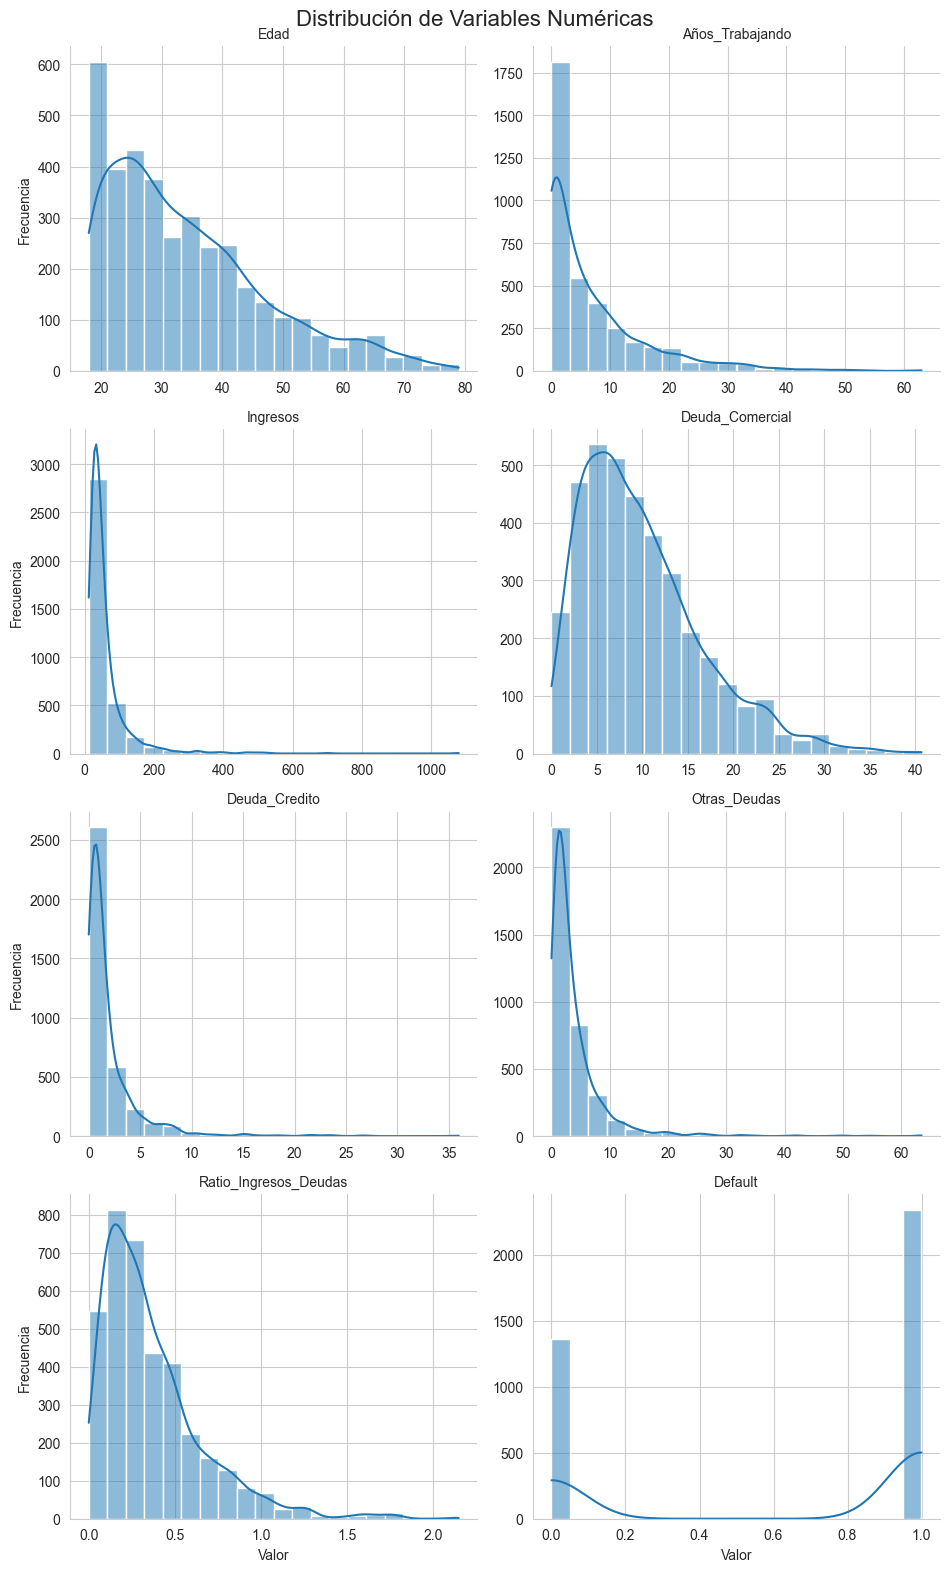

In [44]:
# Seleccionar las columnas num√©ricas para el histograma
variables_numericas = ['Edad', 'A√±os_Trabajando', 'Ingresos', 'Deuda_Comercial', 'Deuda_Credito',  'Otras_Deudas', 'Ratio_Ingresos_Deudas', 'Default']

# Crear un DataFrame de "largo" para usar con FacetGrid
# Esto es necesario para que cada variable se convierta en una fila de datos
df_histograma = df[variables_numericas].melt(var_name='variable', value_name='valor')

# Crear el FacetGrid y dibujar los histogramas
g = sns.FacetGrid(
    data=df_histograma,
    col='variable',
    col_wrap=2, # Envuelve las columnas en 2 filas
    sharex=False,
    sharey=False,
    height=4,
    aspect=1.2
)

# Mapear el histograma a cada subgr√°fico
g.map(sns.histplot, 'valor', bins=20, kde=True)

# Ajustar t√≠tulos y etiquetas
g.set_axis_labels("Valor", "Frecuencia")
g.set_titles(col_template="{col_name}")

# Agregar un t√≠tulo principal al gr√°fico
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribuci√≥n de Variables Num√©ricas', fontsize=16)

plt.tight_layout()
plt.show()

Se aprecia que:

los clientes tienen mayoritariamente entre 20 y 30 a√±os.

los clientes tienen mayoritariamente menos de 1 a√±o de experiencia.

el ingreso se concentra en las 40 unidades monetarias.

la deuda comercial se concentra en 8.5 unidades. 

la deuda de consumo se concentra bajo las 1.0 unidades.

las otras deudas se concentran bajo las 2.2 unidades.

el ratio de ingresos a deuda se concentra bajo los 0,3.

en la variable objetivo, puede considerarse hacer un balanceo.

no se har√° nada con los outliers, presentes en todas las variables, dado que pueden aportar informaci√≥n importante al modelo, puede generar entrenamiento importante al modelo en situaciones extremas prse a que puede generar m√°s errores dada varianza de los datos. 

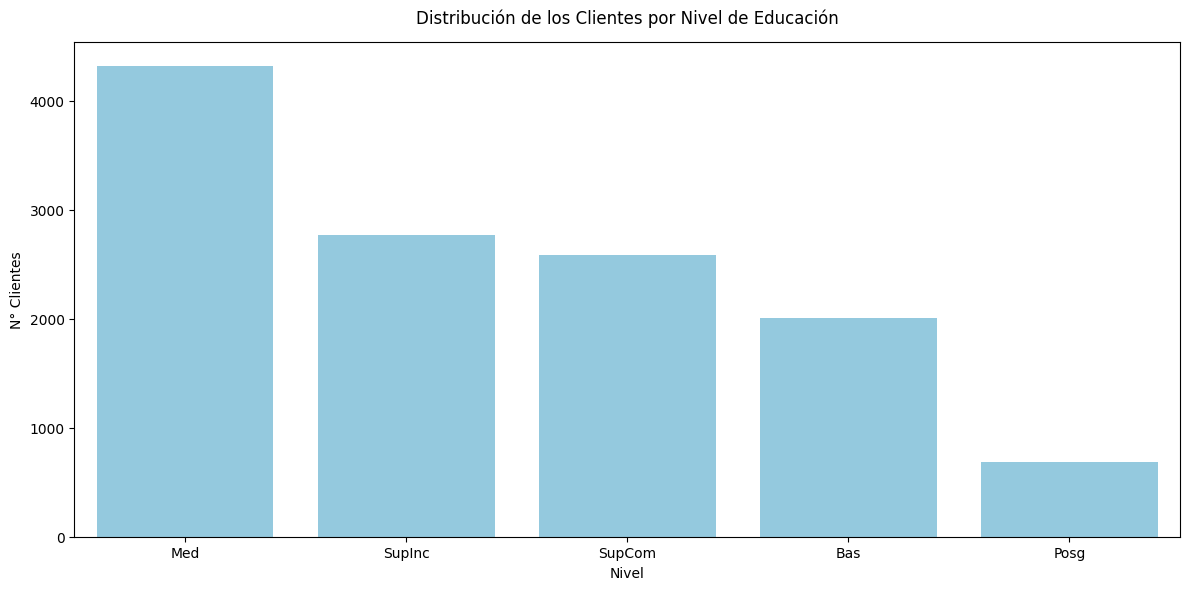

In [14]:
# --- GR√ÅFICO: Educaci√≥n ---

conteo=df['Nivel_Educacional'].value_counts().reset_index()
conteo.columns=['Nivel_Educacional', 'Cantidad']
plt.figure(figsize=(12,6))
sns.barplot(
    data=conteo,
    x='Nivel_Educacional',
    y='Cantidad',
    color='skyblue'
)

# A√±adir t√≠tulos y etiquetas
plt.title('Distribuci√≥n de los Clientes por Nivel de Educaci√≥n', y=1.02)
plt.xlabel("Nivel")
plt.ylabel("N¬∞ Clientes")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### <span style="color: darkorange;">Parte D: Modelamiento de Datos </span>

#### <span style="color: red;">1. Selecci√≥n de las Muestras: </span>


In [15]:
# DIVISI√ìN DE LOS DATOS EN TRAIN Y TEST

df_train, df_test = train_test_split(df, test_size=0.3, random_state=21)

# Imprimir las formas de los nuevos DataFrames para verificar que la divisi√≥n se hizo correctamente
print(f"Forma del conjunto de entrenamiento (df_train): {df_train.shape}")
print(f"Forma del conjunto de prueba (df_test): {df_test.shape}")

Forma del conjunto de entrenamiento (df_train): (8649, 9)
Forma del conjunto de prueba (df_test): (3707, 9)


Se procedi√≥ a:

(i) separar el dataframe aleatoreamente con una semilla predefinida (random_state=21) para la replicabilidad): 

 a-  el 70% de los registros **df_train** con 8649 filas y 9 columnas

 b-  el 30% de los registros **df_test** con 3707 filas y 9 columnas


#### <span style="color: red;">2. An√°lisis Descriptivo: </span>



In [16]:
# Estadisticas descriptivas

df_train.describe(include="all")


Edad Nivel_Educacional  A√±os_Trabajando     Ingresos  \
count   8649.000000              8649      8649.000000  8649.000000   
unique          NaN                 5              NaN          NaN   
top             NaN               Med              NaN          NaN   
freq            NaN              2975              NaN          NaN   
mean      34.147416               NaN         6.950168    59.988322   
std       13.148581               NaN         9.022235    66.795487   
min       18.000000               NaN         0.000000    12.000000   
25%       24.000000               NaN         0.000000    27.000000   
50%       31.000000               NaN         4.000000    40.000000   
75%       42.000000               NaN        10.000000    65.000000   
max       79.000000               NaN        63.000000  1079.000000   

        Deuda_Comercial  Deuda_Credito  Otras_Deudas  Ratio_Ingresos_Deudas  \
count       8649.000000    8649.000000   8649.000000            8649.000000   
unique              NaN            NaN           NaN                    NaN   
top                 NaN            NaN           NaN                    NaN   
freq                NaN            NaN           NaN                    NaN   
mean           9.971349       1.968485      3.913915               0.366373   
std            6.757645       3.047871      5.551821               0.296148   
min            0.000000       0.000000      0.000000               0.000000   
25%            4.700000       0.420000      1.100000               0.150000   
50%            8.500000       1.010000      2.240000               0.290000   
75%           13.600000       2.260000      4.640000               0.500000   
max           40.700000      35.970000     63.470000               2.150000   

            Default  
count   8649.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.633021  
std        0.482009  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [17]:
df_test.describe(include="all")

Edad Nivel_Educacional  A√±os_Trabajando     Ingresos  \
count   3707.000000              3707      3707.000000  3707.000000   
unique          NaN                 5              NaN          NaN   
top             NaN               Med              NaN          NaN   
freq            NaN              1345              NaN          NaN   
mean      34.207445               NaN         6.935797    59.186404   
std       13.110962               NaN         8.929458    68.154071   
min       18.000000               NaN         0.000000    12.000000   
25%       24.000000               NaN         0.000000    27.000000   
50%       31.000000               NaN         4.000000    39.000000   
75%       41.000000               NaN        10.000000    62.000000   
max       79.000000               NaN        63.000000  1079.000000   

        Deuda_Comercial  Deuda_Credito  Otras_Deudas  Ratio_Ingresos_Deudas  \
count       3707.000000    3707.000000   3707.000000            3707.000000   
unique              NaN            NaN           NaN                    NaN   
top                 NaN            NaN           NaN                    NaN   
freq                NaN            NaN           NaN                    NaN   
mean           9.886161       1.937289      3.771492               0.363933   
std            6.678513       2.969837      5.165213               0.294873   
min            0.000000       0.000000      0.000000               0.000000   
25%            4.800000       0.440000      1.080000               0.150000   
50%            8.500000       0.980000      2.170000               0.290000   
75%           13.300000       2.160000      4.565000               0.490000   
max           40.700000      35.970000     63.470000               2.150000   

            Default  
count   3707.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.632317  
std        0.482239  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [19]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8649 entries, 9404 to 5327
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Edad                   8649 non-null   int64  
 1   Nivel_Educacional      8649 non-null   object 
 2   A√±os_Trabajando        8649 non-null   int64  
 3   Ingresos               8649 non-null   int64  
 4   Deuda_Comercial        8649 non-null   float64
 5   Deuda_Credito          8649 non-null   float64
 6   Otras_Deudas           8649 non-null   float64
 7   Ratio_Ingresos_Deudas  8649 non-null   float64
 8   Default                8649 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 675.7+ KB


In [21]:
df_train.groupby('Nivel_Educacional', observed=False)['Default'].describe()

count      mean       std  min  25%  50%  75%  max
Nivel_Educacional                                                     
Bas                1410.0  0.734043  0.441998  0.0  0.0  1.0  1.0  1.0
Med                2975.0  0.618824  0.485757  0.0  0.0  1.0  1.0  1.0
Posg                500.0  0.694000  0.461291  0.0  0.0  1.0  1.0  1.0
SupCom             1809.0  0.549475  0.497684  0.0  0.0  1.0  1.0  1.0
SupInc             1955.0  0.643478  0.479094  0.0  0.0  1.0  1.0  1.0

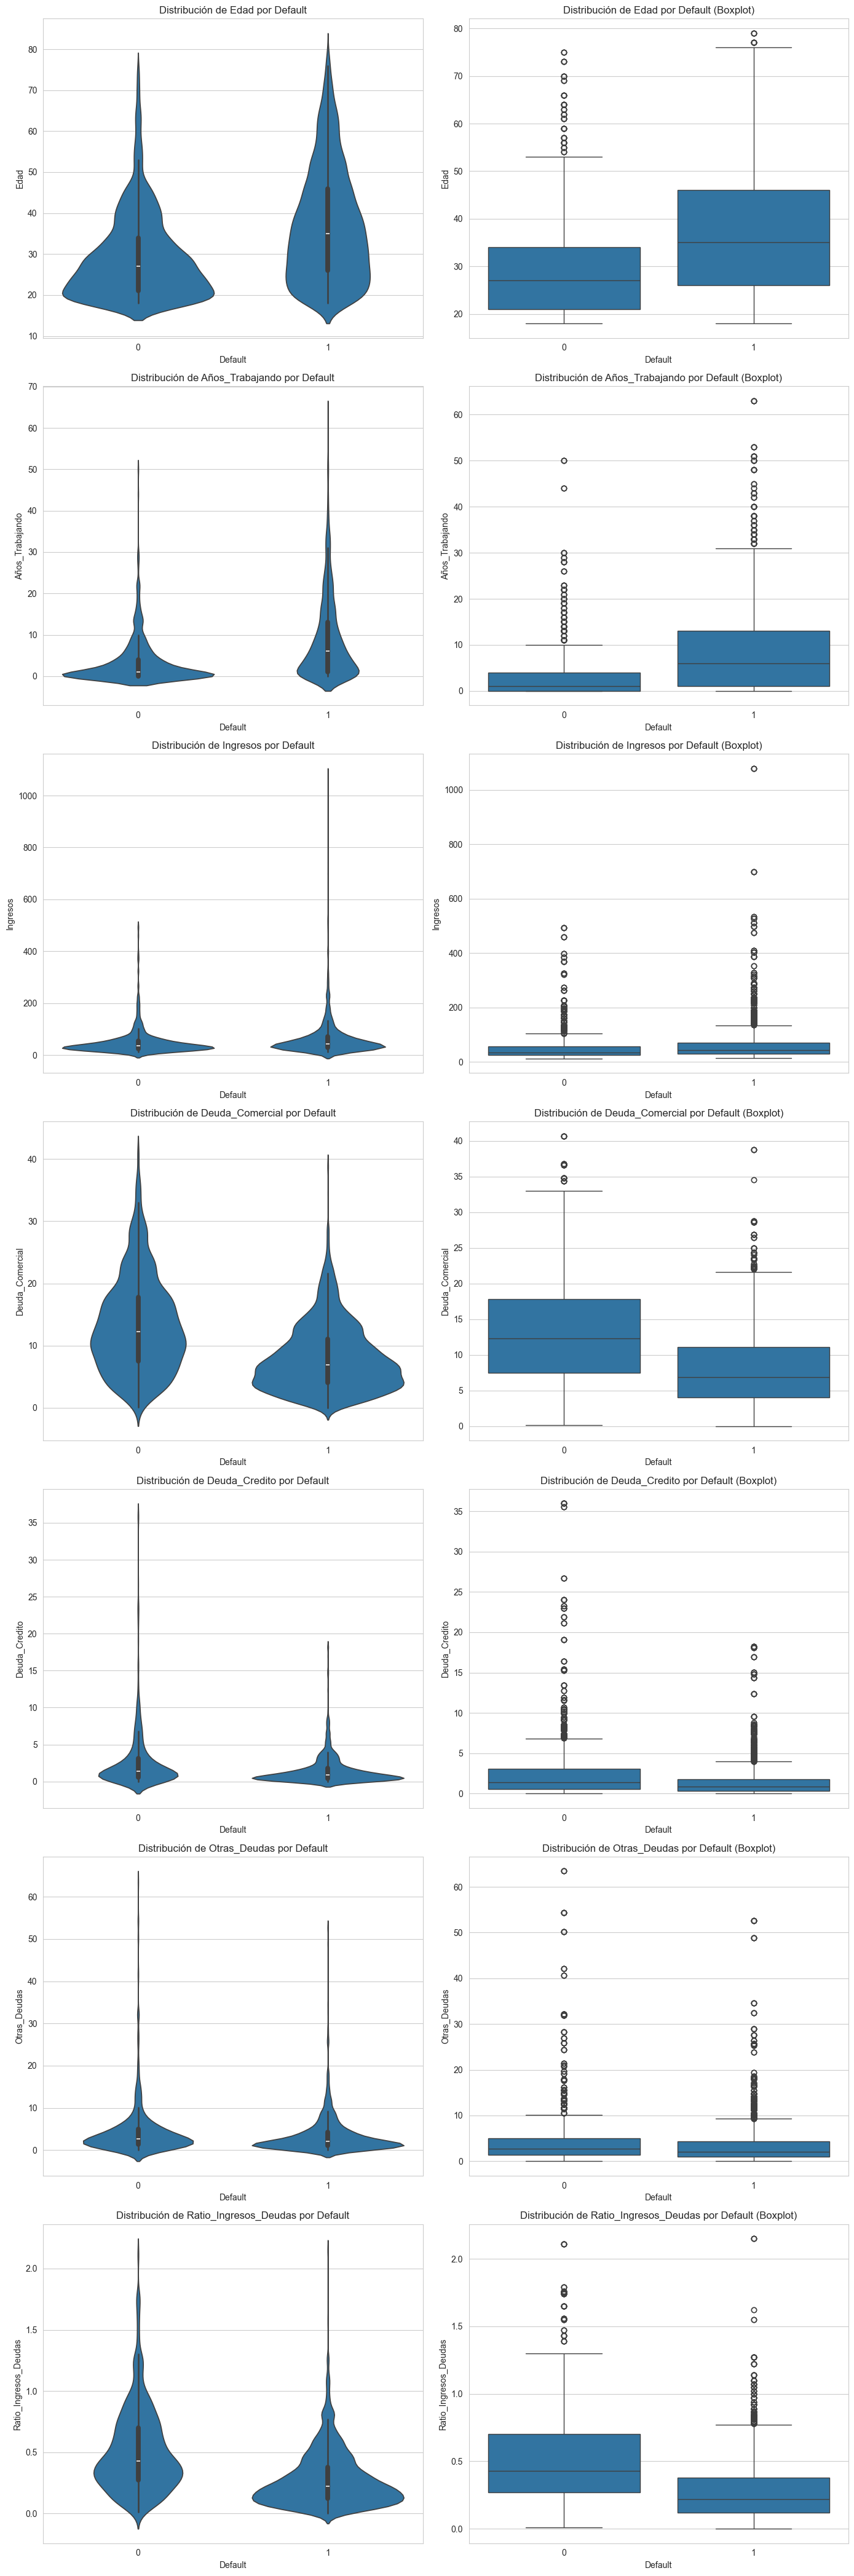

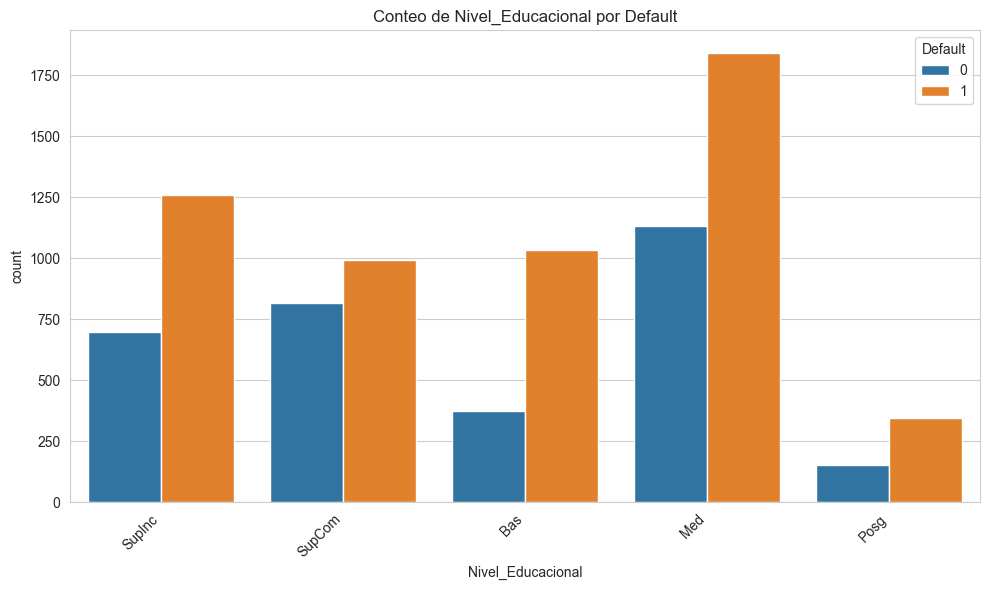

In [22]:
# Gr√°ficos de las variables vs Default

# Define las variables
variables_numericas = ['Edad', 'A√±os_Trabajando', 'Ingresos', 'Deuda_Comercial', 'Deuda_Credito', 'Otras_Deudas', 'Ratio_Ingresos_Deudas']
variables_categoricas = ['Nivel_Educacional']
variable_objetivo = 'Default'

# Configuraci√≥n de los gr√°ficos
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=len(variables_numericas), ncols=2, figsize=(14, 6 * len(variables_numericas)))

# Gr√°ficos para variables num√©ricas
for i, col in enumerate(variables_numericas):
    # Gr√°fico de viol√≠n
    sns.violinplot(x=variable_objetivo, y=col, data=df_train, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribuci√≥n de {col} por Default')
    
    # Gr√°fico de caja (boxplot)
    sns.boxplot(x=variable_objetivo, y=col, data=df_train, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribuci√≥n de {col} por Default (Boxplot)')

plt.tight_layout()
plt.show()

# Gr√°ficos para variables categ√≥ricas
for col in variables_categoricas:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue=variable_objetivo, data=df_train)
    plt.title(f'Conteo de {col} por Default')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

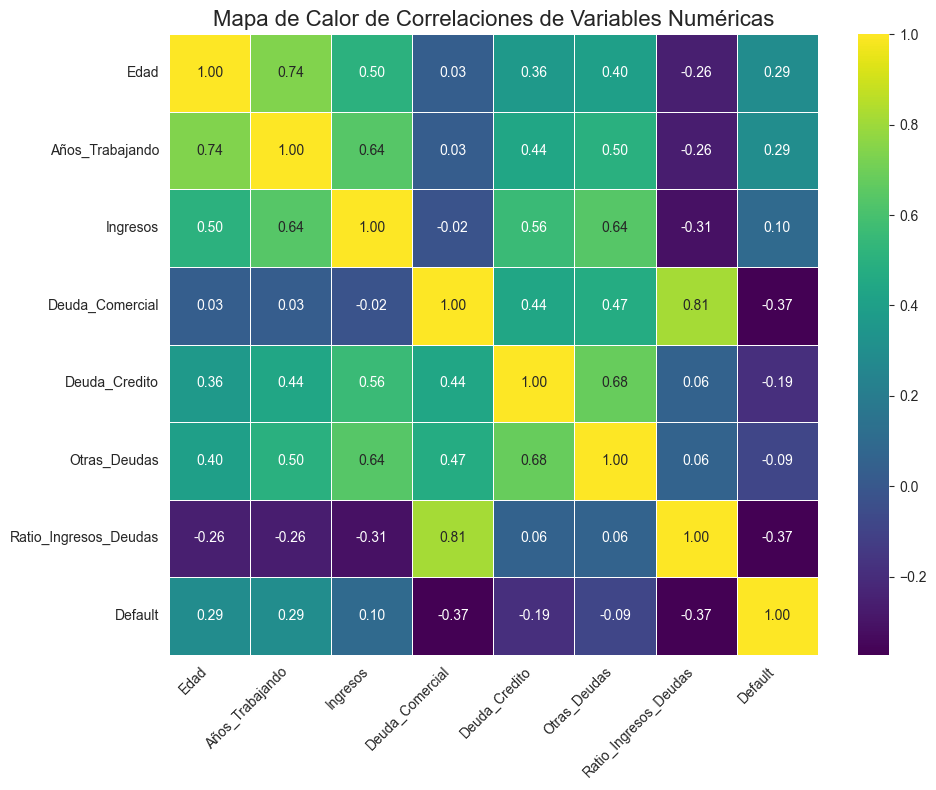

In [25]:
# Seleccionar solo las columnas num√©ricas relevantes para la correlaci√≥n
columnas_numericas = ['Edad', 'A√±os_Trabajando', 'Ingresos', 'Deuda_Comercial', 'Deuda_Credito', 'Otras_Deudas', 'Ratio_Ingresos_Deudas', 'Default']
df_corr = df_train[columnas_numericas]

# Calcular la matriz de correlaci√≥n de Pearson
correlation_matrix = df_corr.corr()

# --- Crear el mapa de calor ---
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,         # Muestra los valores de correlaci√≥n en el mapa
    cmap='viridis',     # Elige un esquema de color (puedes probar otros como 'coolwarm', 'YlGnBu')
    fmt=".2f",          # Formato de los valores a dos decimales
    linewidths=.5       # A√±ade l√≠neas entre las celdas
)

# Ajustar t√≠tulo
plt.title('Mapa de Calor de Correlaciones de Variables Num√©ricas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Las correlaciones entre las variable son las siguientes:

`Edad` est√° correlacionada directa con `A√±os_trabajando` e `Ingresos`

`A√±os_Trabajando` adem√°s se correlaciona directamente con `Otras_Deudas`

`Ingresos` adem√°s se correlaciona directamente con `Deuda_Credito` y `Otras_Deudas`

`Deuda_Comercial` se correlaciona directamente con `Ratio_Ingresos_Deudas`

`Deuda_Credito` adem√°s se correlacioan directamente con `Otras_Deudas` 

`Default` solo tiene correlaciones d√©biles con el resto de las variables num√©ricas


#### <span style="color: red;">3. Divisi√≥n de Tablas entrenamiento y testeo: </span>

In [27]:
# DIVISI√ìN DE DATOS 

# Create a list with the names of the feature columns
feature_columns = ['Edad', 'A√±os_Trabajando', 'Ingresos', 'Deuda_Comercial', 'Deuda_Credito', 
                   'Otras_Deudas', 'Ratio_Ingresos_Deudas', 'Nivel_Educacional']

# Correctly select the feature columns using the list
x_train = df_train[feature_columns]
y_train = df_train['Default']
x_test = df_test[feature_columns]
y_test = df_test['Default']


#### <span style="color: red;">4. Creaci√≥n y Transformaci√≥n de Variables: </span>

In [28]:
# TRANSFORMANDO CON TARGET ENCODER 'Nivel_Educacional'

from category_encoders import TargetEncoder


# 1. Separar X y y para los conjuntos de entrenamiento y prueba
X_train = df_train.drop('Default', axis=1)
y_train = df_train['Default']

X_test = df_test.drop('Default', axis=1)
y_test = df_test['Default']

# 2. Inicializar el codificador
# Le indicamos la columna que queremos codificar
encoder = TargetEncoder(cols=['Nivel_Educacional'])

# 3. Ajustar (fit) el codificador √öNICAMENTE en el conjunto de ENTRENAMIENTO
# Esto es vital para evitar la fuga de datos
encoder.fit(X_train, y_train)

# 4. Transformar los datos de entrenamiento y prueba
# Se usa el mapeo aprendido en el paso anterior para ambos sets
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Opcional: Mostrar los cambios en la variable codificada
print("Variable 'Nivel_Educacional' en X_train original:")
print(X_train['Nivel_Educacional'].head())
print("\nVariable codificada en X_train_encoded:")
print(X_train_encoded['Nivel_Educacional'].head())

print("\nVariable 'Nivel_Educacional' en X_test original:")
print(X_test['Nivel_Educacional'].head())
print("\nVariable codificada en X_test_encoded:")
print(X_test_encoded['Nivel_Educacional'].head())

Variable 'Nivel_Educacional' en X_train original:
9404     SupInc
1551     SupCom
12024       Bas
2594        Bas
5504        Med
Name: Nivel_Educacional, dtype: object

Variable codificada en X_train_encoded:
9404     0.643478
1551     0.549475
12024    0.734043
2594     0.734043
5504     0.618824
Name: Nivel_Educacional, dtype: float64

Variable 'Nivel_Educacional' en X_test original:
6467       Med
6628    SupInc
2104    SupCom
4638    SupInc
5647       Bas
Name: Nivel_Educacional, dtype: object

Variable codificada en X_test_encoded:
6467    0.618824
6628    0.643478
2104    0.549475
4638    0.643478
5647    0.734043
Name: Nivel_Educacional, dtype: float64


In [29]:
X_train_encoded.describe()


Edad  Nivel_Educacional  A√±os_Trabajando     Ingresos  \
count  8649.000000        8649.000000      8649.000000  8649.000000   
mean     34.147416           0.633021         6.950168    59.988322   
std      13.148581           0.058592         9.022235    66.795487   
min      18.000000           0.549475         0.000000    12.000000   
25%      24.000000           0.618824         0.000000    27.000000   
50%      31.000000           0.618824         4.000000    40.000000   
75%      42.000000           0.643478        10.000000    65.000000   
max      79.000000           0.734043        63.000000  1079.000000   

       Deuda_Comercial  Deuda_Credito  Otras_Deudas  Ratio_Ingresos_Deudas  
count      8649.000000    8649.000000   8649.000000            8649.000000  
mean          9.971349       1.968485      3.913915               0.366373  
std           6.757645       3.047871      5.551821               0.296148  
min           0.000000       0.000000      0.000000               0.000000  
25%           4.700000       0.420000      1.100000               0.150000  
50%           8.500000       1.010000      2.240000               0.290000  
75%          13.600000       2.260000      4.640000               0.500000  
max          40.700000      35.970000     63.470000               2.150000

Dado que existe una relaci√≥n entre `Nivel_Educacional` y `Default` se decidi√≥ codificar con *Target Encoding* cada uno de los niveles educacionales.

A partir de ahora se debe usar **X_train_encoded** y **X_test_encoded**

##### <span style="color: violet;">a. Modelo b√°sico: </span>


üìä Resultados - TRAIN
AUC: 0.8450 | KS: 0.5121 | Threshold √≥ptimo: 0.5126
Accuracy: 0.7735 | Precision: 0.7976 | Recall: 0.8606 | F1: 0.8279
Matriz de Confusi√≥n:
[[1978 1196]
 [ 763 4712]]

üìä Resultados - TEST
AUC: 0.8389 | KS: 0.5199 | Threshold √≥ptimo: 0.5666
Accuracy: 0.7618 | Precision: 0.8115 | Recall: 0.8119 | F1: 0.8117
Matriz de Confusi√≥n:
[[ 921  442]
 [ 441 1903]]


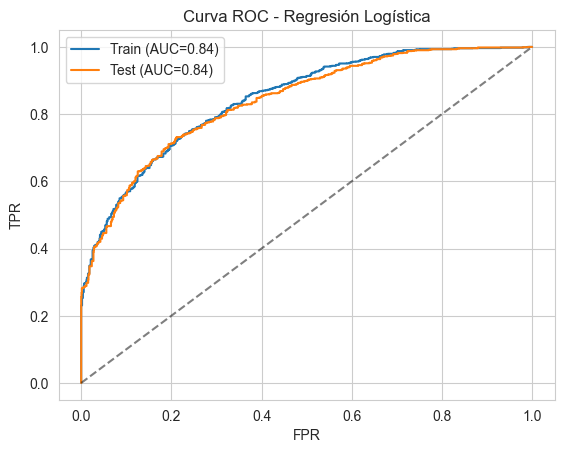


üìã M√©tricas resumidas:
  Muestra       AUC        KS  Threshold  Accuracy  Precision    Recall  \
0   Train  0.844959  0.512097   0.512614  0.773500   0.797563  0.860639   
1    Test  0.838897  0.519930   0.566578  0.761802   0.811514  0.811860   

         F1  
0  0.827901  
1  0.811687  


In [40]:
from sklearn.metrics import (
    roc_curve, roc_auc_score, accuracy_score,
    precision_score, recall_score, f1_score, confusion_matrix
)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# üì¶ Funci√≥n para evaluar modelo
def evaluar_logit(modelo, X, y, muestra):
    df = X.copy()
    df['Default'] = y
    pred = modelo.predict(df)

    # ROC y KS
    fpr, tpr, thresholds = roc_curve(y, pred)
    auc = roc_auc_score(y, pred)
    ks = max(tpr - fpr)

    # Umbral √≥ptimo por m√°xima accuracy
    acc_list = [accuracy_score(y, (pred >= thr).astype(int)) for thr in thresholds]
    idx_max = np.argmax(acc_list)
    threshold_optimo = thresholds[idx_max]

    # Predicci√≥n binaria
    pred_class = (pred >= threshold_optimo).astype(int)

    # M√©tricas
    acc = accuracy_score(y, pred_class)
    prec = precision_score(y, pred_class)
    rec = recall_score(y, pred_class)
    f1 = f1_score(y, pred_class)
    cm = confusion_matrix(y, pred_class)

    print(f"\nüìä Resultados - {muestra.upper()}")
    print(f"AUC: {auc:.4f} | KS: {ks:.4f} | Threshold √≥ptimo: {threshold_optimo:.4f}")
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")
    print("Matriz de Confusi√≥n:")
    print(cm)

    # Curva ROC
    plt.plot(fpr, tpr, label=f'{muestra} (AUC={auc:.2f})')
    return {
        'Muestra': muestra,
        'AUC': auc,
        'KS': ks,
        'Threshold': threshold_optimo,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1
    }

# üß™ Evaluar train y test
metricas_train = evaluar_logit(modelo_inicial, X_train_encoded, y_train, 'Train')
metricas_test = evaluar_logit(modelo_inicial, X_test_encoded, y_test, 'Test')

# üìà Mostrar curva ROC
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC - Regresi√≥n Log√≠stica')
plt.legend()
plt.grid(True)
plt.show()

# üìã DataFrame de m√©tricas
metricas_inicial = pd.DataFrame([metricas_train, metricas_test])
print("\nüìã M√©tricas resumidas:")
print(metricas_inicial)


##### <span style="color: violet;">b. Modelo √°rboles: </span>

In [41]:
# Optimizacip√≥n del arbol de decisi√≥n

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el √°rbol base
tree = DecisionTreeClassifier(random_state=21)

# Definir la grilla de hiperpar√°metros
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Ejecutar b√∫squeda
grid_search.fit(X_train_encoded, y_train)

# Mejor modelo
best_tree = grid_search.best_estimator_
print("üîç Mejor combinaci√≥n de hiperpar√°metros:")
print(grid_search.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
üîç Mejor combinaci√≥n de hiperpar√°metros:
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 2}



üå≥ √Årbol de decisi√≥n - TRAIN:
AUC: 0.9001
KS: 0.6217
Threshold √≥ptimo: 0.6471
Accuracy: 0.7932
Precisi√≥n: 0.9129
Sensibilidad (Recall): 0.7443
Puntaje F1: 0.8200
Matriz de Confusi√≥n:
[[2785  389]
 [1400 4075]]

üå≥ √Årbol de decisi√≥n - TEST:
AUC: 0.8869
KS: 0.5978
Threshold √≥ptimo: 0.7179
Accuracy: 0.7791
Precisi√≥n: 0.9080
Sensibilidad (Recall): 0.7240
Puntaje F1: 0.8056
Matriz de Confusi√≥n:
[[1191  172]
 [ 647 1697]]

üìã M√©tricas resumidas:
  Muestra       AUC        KS  Threshold  Accuracy  Precision    Recall  \
0   Train  0.900140  0.621734   0.647059  0.793155   0.912858  0.744292   
1    Test  0.886892  0.597784   0.717949  0.779067   0.907972  0.723976   

         F1  
0  0.820002  
1  0.805602  


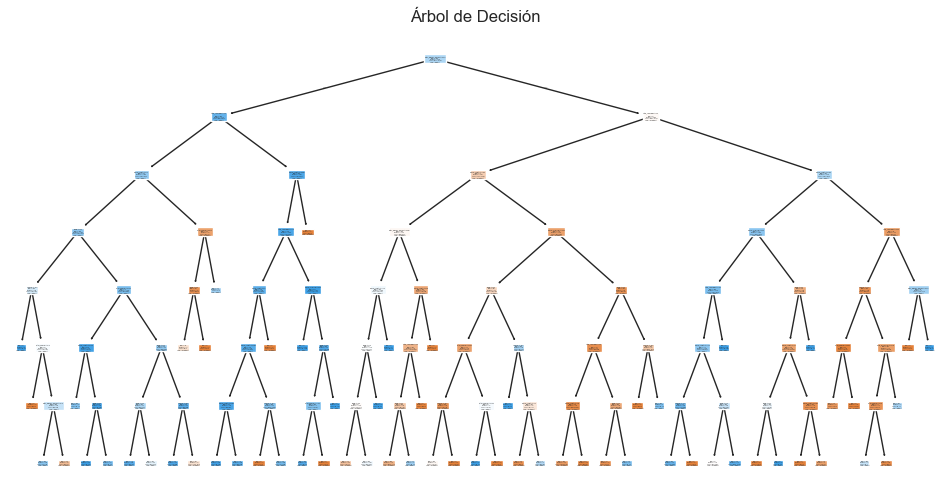


üîé Importancia de variables:
Ratio_Ingresos_Deudas    0.281344
Deuda_Credito            0.245159
A√±os_Trabajando          0.176889
Edad                     0.119518
Deuda_Comercial          0.060707
Ingresos                 0.057798
Otras_Deudas             0.054330
Nivel_Educacional        0.004255
dtype: float64


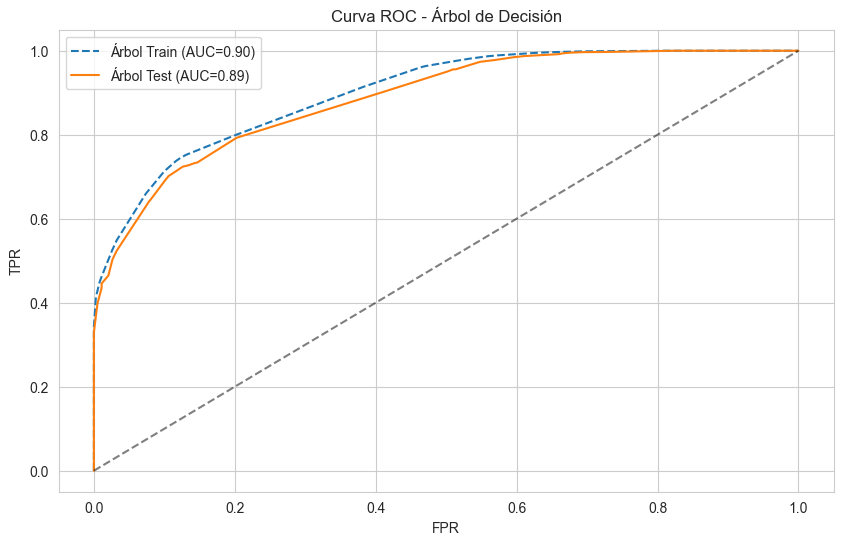

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    roc_curve, roc_auc_score, accuracy_score, confusion_matrix,
    precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Entrenar modelo
tree_model = DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=2, random_state=21)
tree_model.fit(X_train_encoded, y_train)

# Funci√≥n para calcular m√©tricas
def evaluar_modelo(modelo, X, y, muestra):
    probs = modelo.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y, probs)
    auc = roc_auc_score(y, probs)
    ks = max(tpr - fpr)
    threshold_optimo = thresholds[np.argmax(tpr - fpr)]
    pred = (probs >= threshold_optimo).astype(int)

    acc = accuracy_score(y, pred)
    prec = precision_score(y, pred)
    rec = recall_score(y, pred)
    f1 = f1_score(y, pred)
    cm = confusion_matrix(y, pred)

    print(f"\nüå≥ √Årbol de decisi√≥n - {muestra.upper()}:")
    print(f"AUC: {auc:.4f}")
    print(f"KS: {ks:.4f}")
    print(f"Threshold √≥ptimo: {threshold_optimo:.4f}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precisi√≥n: {prec:.4f}")
    print(f"Sensibilidad (Recall): {rec:.4f}")
    print(f"Puntaje F1: {f1:.4f}")
    print("Matriz de Confusi√≥n:")
    print(cm)

    return {
        'Muestra': muestra,
        'AUC': auc,
        'KS': ks,
        'Threshold': threshold_optimo,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1
    }, fpr, tpr

# Evaluar train y test
metricas_train, fpr_train, tpr_train = evaluar_modelo(tree_model, X_train_encoded, y_train, 'Train')
metricas_test, fpr_test, tpr_test = evaluar_modelo(tree_model, X_test_encoded, y_test, 'Test')

# üìä DataFrame de m√©tricas
metricas_arbol = pd.DataFrame([metricas_train, metricas_test])
print("\nüìã M√©tricas resumidas:")
print(metricas_arbol)

# üå≤ Visualizaci√≥n del √°rbol
plt.figure(figsize=(12, 6))
plot_tree(tree_model, feature_names=X_train_encoded.columns, class_names=['No Default', 'Default'], filled=True)
plt.title("√Årbol de Decisi√≥n")
plt.show()

# üîç Importancia de variables
importancias = pd.Series(tree_model.feature_importances_, index=X_train_encoded.columns)
importancias = importancias.sort_values(ascending=False)
print("\nüîé Importancia de variables:")
print(importancias)

# üìà Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'√Årbol Train (AUC={metricas_train["AUC"]:.2f})', linestyle='--')
plt.plot(fpr_test, tpr_test, label=f'√Årbol Test (AUC={metricas_test["AUC"]:.2f})', linestyle='-')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC - √Årbol de Decisi√≥n')
plt.legend()
plt.grid(True)
plt.show()


Optimization terminated successfully.
         Current function value: 0.457398
         Iterations 8

üìä LOGIT - TRAIN
AUC: 0.8450 | KS: 0.5121 | Threshold √≥ptimo (F1): 0.3789
Accuracy: 0.7653 | Precision: 0.7509 | Recall: 0.9416 | F1: 0.8355
Matriz de Confusi√≥n:
[[1464 1710]
 [ 320 5155]]

üìä LOGIT - TEST
AUC: 0.8389 | KS: 0.5199 | Threshold √≥ptimo (F1): 0.3533
Accuracy: 0.7453 | Precision: 0.7315 | Recall: 0.9437 | F1: 0.8241
Matriz de Confusi√≥n:
[[ 551  812]
 [ 132 2212]]

üìä TREE - TRAIN
AUC: 0.8173 | KS: 0.4890 | Threshold √≥ptimo (F1): 0.4146
Accuracy: 0.7544 | Precision: 0.7424 | Recall: 0.9374 | F1: 0.8285
Matriz de Confusi√≥n:
[[1393 1781]
 [ 343 5132]]

üìä TREE - TEST
AUC: 0.8103 | KS: 0.4790 | Threshold √≥ptimo (F1): 0.4038
Accuracy: 0.7337 | Precision: 0.7178 | Recall: 0.9539 | F1: 0.8192
Matriz de Confusi√≥n:
[[ 484  879]
 [ 108 2236]]


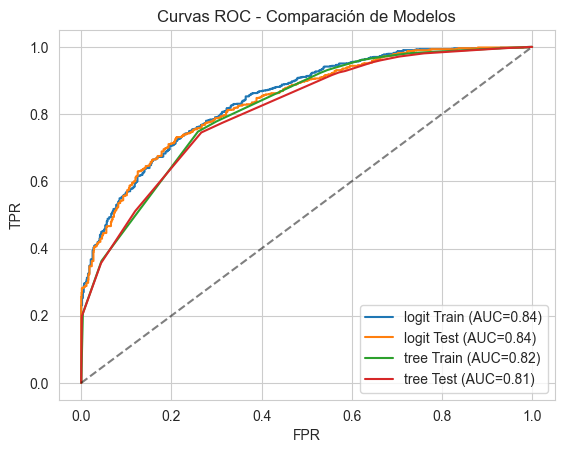


üìã Comparaci√≥n de modelos:
  Modelo Muestra       AUC        KS  Threshold  Accuracy  Precision  \
0  logit   Train  0.844959  0.512097   0.378949  0.765291   0.750910   
1  logit    Test  0.838897  0.519930   0.353258  0.745347   0.731481   
2   tree   Train  0.817260  0.488966   0.414634  0.754422   0.742369   
3   tree    Test  0.810299  0.478983   0.403785  0.733747   0.717817   

     Recall        F1  
0  0.941553  0.835494  
1  0.943686  0.824143  
2  0.937352  0.828544  
3  0.953925  0.819198  


In [43]:
# 1. Entrenamiento de modelos
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm

# √Årbol
tree_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=75, random_state=21)
tree_model.fit(X_train_encoded, y_train)

# Regresi√≥n log√≠stica
df_train_encoded = X_train_encoded.copy()
df_train_encoded['Default'] = y_train
formula = 'Default ~ Edad + Nivel_Educacional + A√±os_Trabajando + Ingresos + Deuda_Comercial + Deuda_Credito + Otras_Deudas + Ratio_Ingresos_Deudas'
modelo_inicial = sm.Logit.from_formula(formula, data=df_train_encoded).fit()

# 2. Funci√≥n de evaluaci√≥n por F1
def evaluar_modelo_por_f1(modelo, X, y, muestra, tipo='logit'):
    from sklearn.metrics import (
        roc_curve, roc_auc_score, accuracy_score,
        precision_score, recall_score, f1_score, confusion_matrix
    )
    import numpy as np

    if tipo == 'logit':
        df = X.copy()
        df['Default'] = y
        probs = modelo.predict(df)
    else:
        probs = modelo.predict_proba(X)[:, 1]

    fpr, tpr, thresholds = roc_curve(y, probs)
    auc = roc_auc_score(y, probs)
    ks = max(tpr - fpr)
    f1_scores = [f1_score(y, (probs >= thr).astype(int)) for thr in thresholds]
    idx_max = np.argmax(f1_scores)
    threshold_optimo = thresholds[idx_max]
    pred_class = (probs >= threshold_optimo).astype(int)

    acc = accuracy_score(y, pred_class)
    prec = precision_score(y, pred_class)
    rec = recall_score(y, pred_class)
    f1 = f1_score(y, pred_class)
    cm = confusion_matrix(y, pred_class)

    print(f"\nüìä {tipo.upper()} - {muestra.upper()}")
    print(f"AUC: {auc:.4f} | KS: {ks:.4f} | Threshold √≥ptimo (F1): {threshold_optimo:.4f}")
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")
    print("Matriz de Confusi√≥n:")
    print(cm)

    return {
        'Modelo': tipo,
        'Muestra': muestra,
        'AUC': auc,
        'KS': ks,
        'Threshold': threshold_optimo,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1
    }

# 3. Evaluaci√≥n
metricas = []
for modelo, tipo in [(modelo_inicial, 'logit'), (tree_model, 'tree')]:
    for X, y, muestra in [(X_train_encoded, y_train, 'Train'), (X_test_encoded, y_test, 'Test')]:
        resultado = evaluar_modelo_por_f1(modelo, X, y, muestra, tipo)
        metricas.append(resultado)

# 4. Visualizaci√≥n ROC
import matplotlib.pyplot as plt
for resultado in metricas:
    modelo = resultado['Modelo']
    muestra = resultado['Muestra']
    # Recalcular fpr/tpr para graficar
    if modelo == 'logit':
        df = X_train_encoded.copy() if muestra == 'Train' else X_test_encoded.copy()
        df['Default'] = y_train if muestra == 'Train' else y_test
        probs = modelo_inicial.predict(df)
    else:
        probs = tree_model.predict_proba(X_train_encoded if muestra == 'Train' else X_test_encoded)[:, 1]
    fpr, tpr, _ = roc_curve(y_train if muestra == 'Train' else y_test, probs)
    plt.plot(fpr, tpr, label=f'{modelo} {muestra} (AUC={resultado["AUC"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curvas ROC - Comparaci√≥n de Modelos')
plt.legend()
plt.grid(True)
plt.show()

# 5. DataFrame final
metricas_df = pd.DataFrame(metricas)
print("\nüìã Comparaci√≥n de modelos:")
print(metricas_df)
